<a href="https://colab.research.google.com/github/yhussain1/MachineLearning/blob/main/FPLStandardise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports and Read CSV
#import packages required
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import stats
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(15,10)})
# Loading the csv file, we don't split it as we are clustering
# Sel. column is stored as percentage so converted to decimal values

fpl = pd.read_csv("fpl.csv", delimiter = ',')
fpl['Sel.'] = (fpl['Sel.'].str.rstrip('%').astype('float')/100).apply(lambda y: round(y,3))

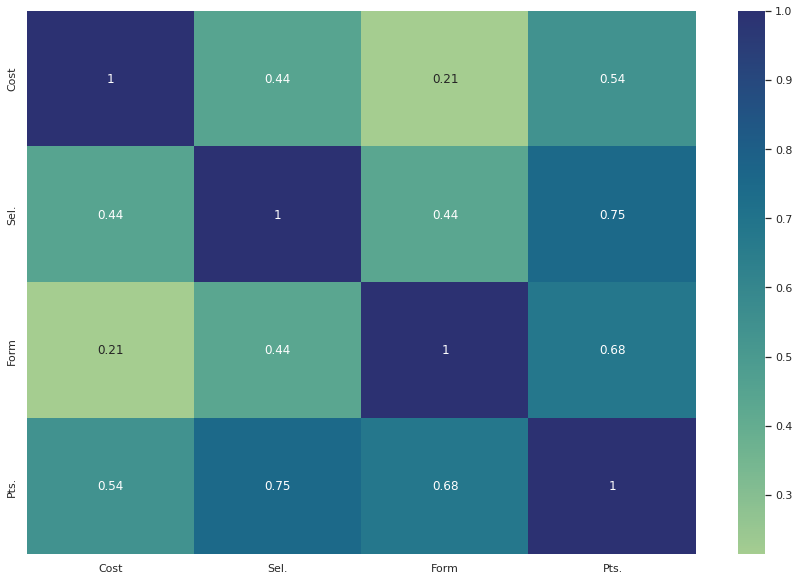

In [ ]:
sns.heatmap(fpl.corr(), annot=True, cmap="crest")
plt.show()

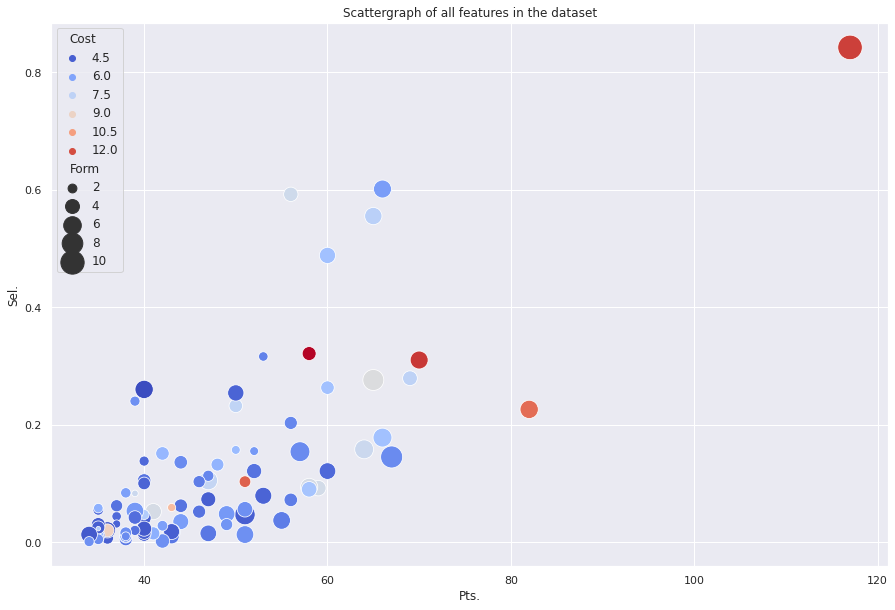

In [ ]:
x = fpl['Pts.']
y = fpl['Sel.']
no_x = fpl['Cost']
no_y = fpl['Form']
sns.scatterplot (x, y, size=no_y, sizes=(20,600), hue=no_x, 
                 palette='coolwarm').set(title="Scattergraph of all features in the dataset")
plt.show()

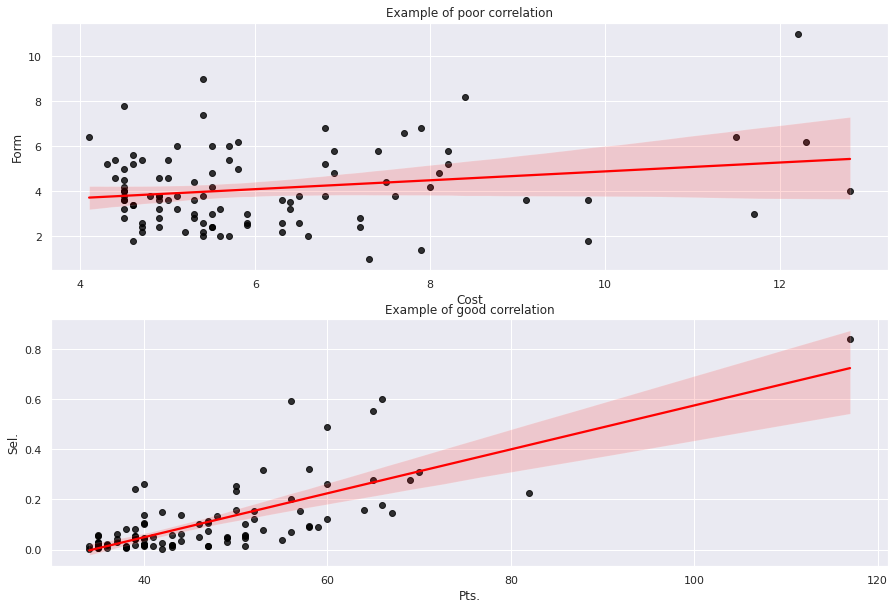

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,10))
sns.regplot (x, y, ax=ax2, scatter_kws={"color": "black"}, 
             line_kws={"color": "red"}).set(title="Example of good correlation")
sns.regplot (no_x, no_y, ax=ax1, scatter_kws={"color": "black"}, 
             line_kws={"color": "red"}).set(title="Example of poor correlation")
plt.show()

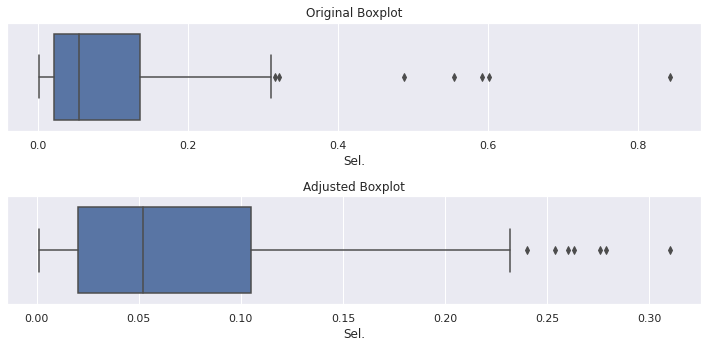

In [ ]:
# Remove outliers and only keep data consistent withing the quartile ranges
fpl1 = fpl.copy()

for i in ['Sel.']:
    q75,q25 = np.percentile(fpl.loc[:,i],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    fpl.loc[fpl[i] < min,i] = np.nan
    fpl.loc[fpl[i] > max,i] = np.nan
  
fpl.isnull().sum()
fpl = fpl.dropna(axis=0)

# data now has fewer outliers
#fpl.boxplot('Sel.')
#plt.ylabel('Teams Selected by')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(fpl['Sel.'], ax=ax2).set(title="Adjusted Boxplot")
sns.boxplot(fpl1['Sel.'], ax=ax1).set(title="Original Boxplot")
fig.tight_layout()
plt.show()

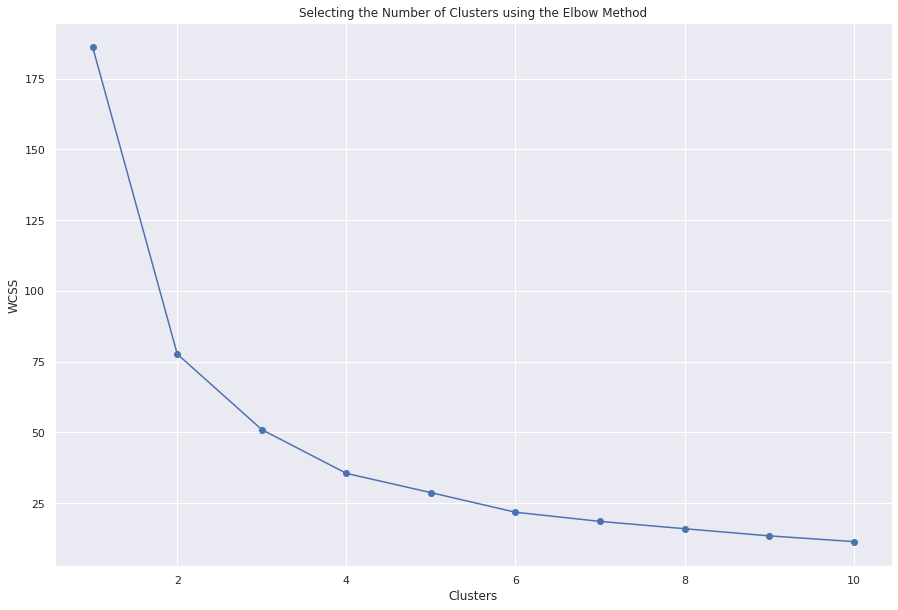

In [ ]:
fpls = fpl[['Sel.', 'Pts.']].copy()
scale = StandardScaler()
fpls = scale.fit_transform(fpls)

data = fpls


for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(data)

wcss=[]

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS') # within cluster sum of square
plt.show()

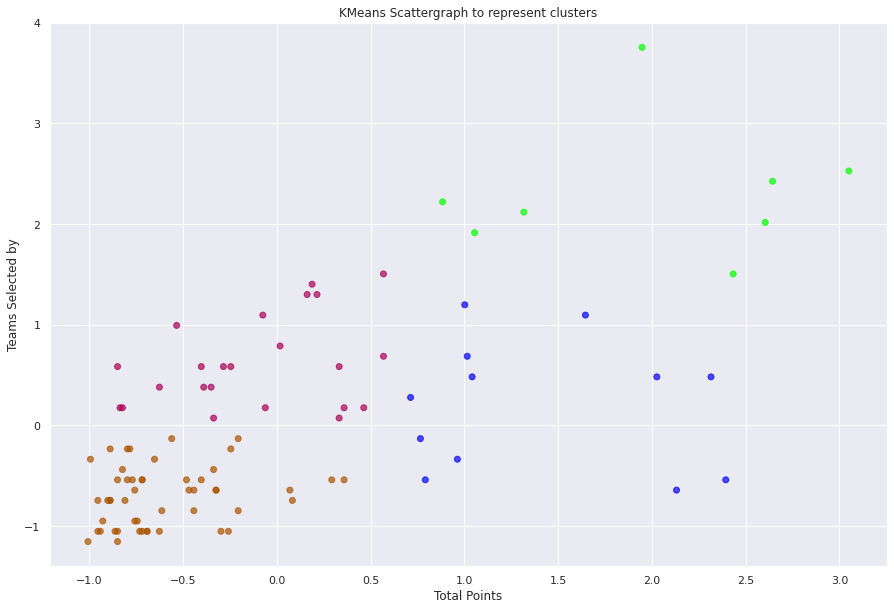

In [ ]:
x = fpls[:, 0]
y = fpls[:, 1]

kmeans = KMeans(init='random', n_clusters=4, random_state=2)
kmeans.fit(data)
labels=kmeans.labels_

plt.scatter(x,y, c=labels, cmap='brg', alpha=0.7)
plt.title("KMeans Scattergraph to represent clusters")
plt.xlabel('Total Points')
plt.ylabel('Teams Selected by')

plt.show()

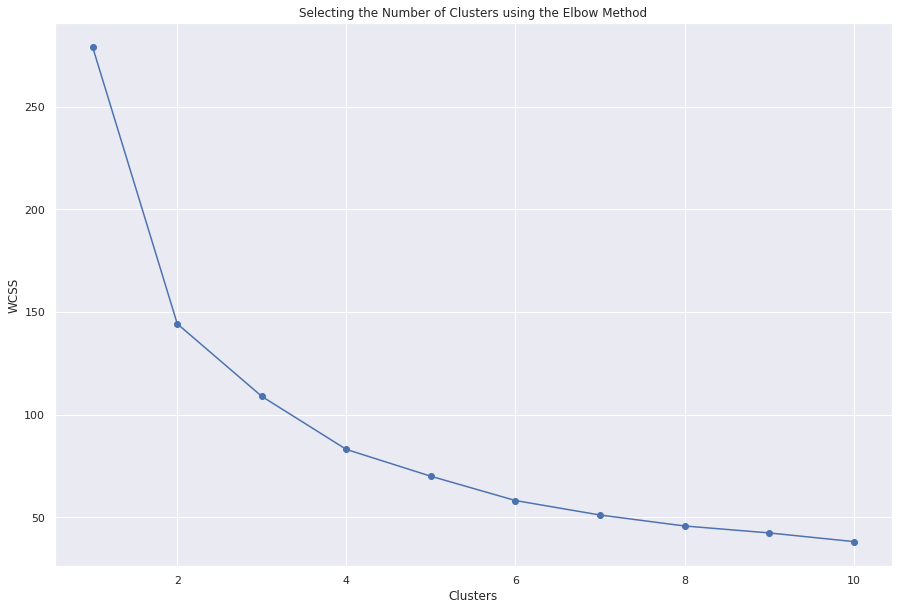

In [ ]:
fpls = fpl[['Sel.', 'Pts.', 'Form']].copy()
data1 = preprocessing.scale(fpls)


for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(data1)

wcss1=[]

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(data1)
  wcss1.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 11), wcss1, marker='o')
plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 0, 'Player Form')

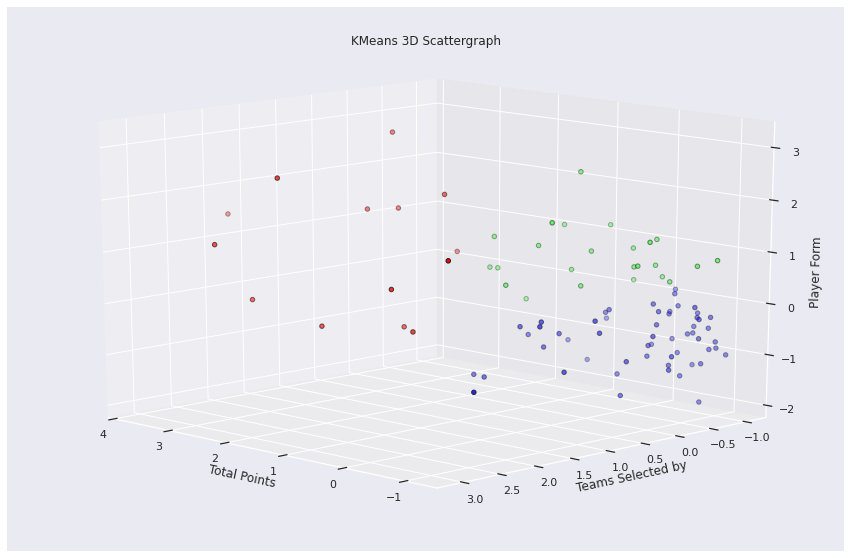

In [ ]:
# plotly 3d model
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(data1)
labels1 = kmeans1.labels_

Scene = dict(xaxis = dict(title  = 'Total Points'),
             yaxis = dict(title  = 'Teams Selected by'),
             zaxis = dict(title  = 'Player Form'))

trace = go.Scatter3d(x=data1[:,1], y=data1[:,0], z=data1[:,2], mode='markers', 
                     marker=dict(color=labels, size=10, line=dict(color='black', width=10)))

layout = go.Layout(margin=dict(l=0,r=0), scene = Scene, height = 600,width = 600)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

fig = plt.figure()
subfigure = fig.add_subplot(111, projection="3d", elev=15, azim=135)
subfigure.scatter(data1[:,1], data1[:,0], data1[:,2], 
                  c=labels1.astype(float), cmap='brg', 
                  edgecolor="k")
subfigure.set_title('KMeans 3D Scattergraph')
subfigure.set_xlabel('Total Points')
subfigure.set_ylabel('Teams Selected by')
subfigure.set_zlabel('Player Form')

# producing a 3d representation of the kmeans cluster

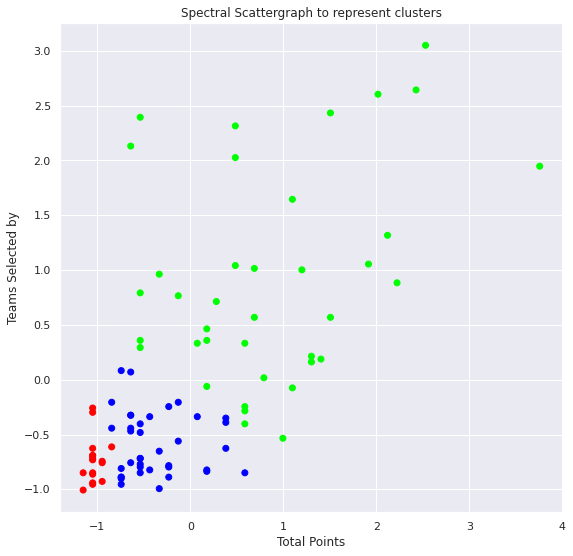

In [ ]:
fpls = fpl[['Sel.', 'Pts.']].copy()
data2 = preprocessing.scale(fpls)

sc_nn = SpectralClustering(n_clusters=3, affinity ='nearest_neighbors', random_state=0)
sc_nn.fit(data2) 

plt.figure(figsize =(9, 9))
plt.scatter(data2[:,1], data2[:,0], c=sc_nn.labels_, cmap='brg')
plt.title("Spectral Scattergraph to represent clusters")
plt.xlabel('Total Points')
plt.ylabel('Teams Selected by')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



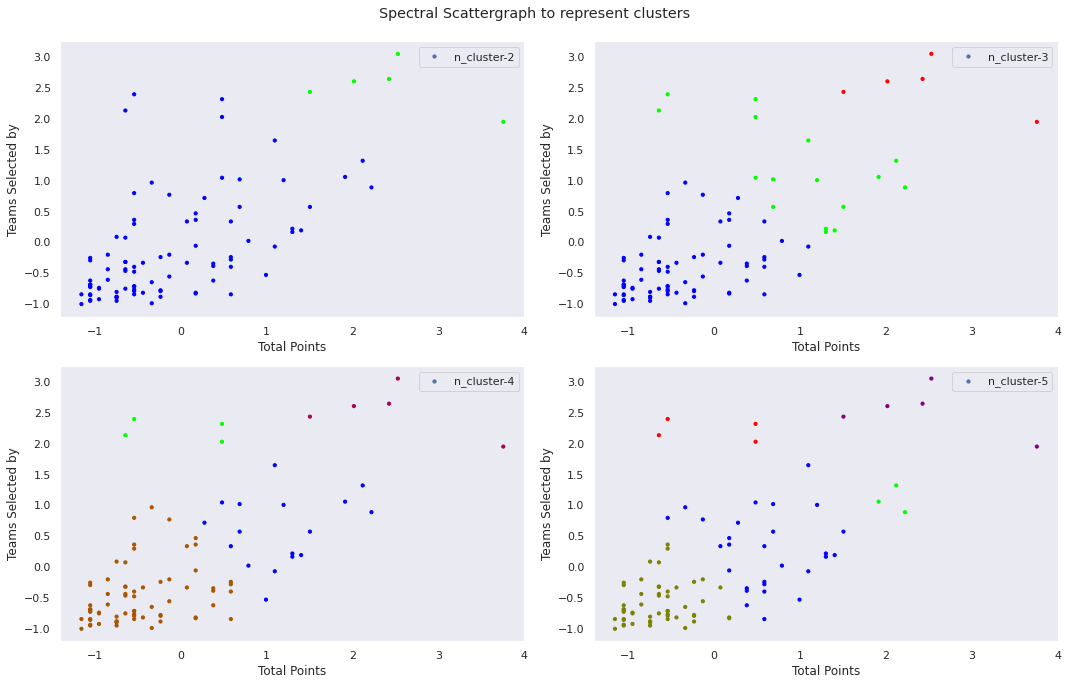

In [ ]:
f = plt.figure()
f.add_subplot(2, 2, 1)
f.suptitle("Spectral Scattergraph to represent clusters")

for i in range(2, 6):
  sc = SpectralClustering(n_clusters=i, random_state=0)
  sc = sc.fit(data2)
  f.add_subplot(2, 2, i-1)
  plt.scatter(data2[:,1], data2[:,0], s=10, c=sc.labels_, label="n_cluster-"+str(i), cmap='brg')
  plt.xlabel('Total Points')
  plt.ylabel('Teams Selected by')
  plt.grid(False)
  plt.legend()

f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

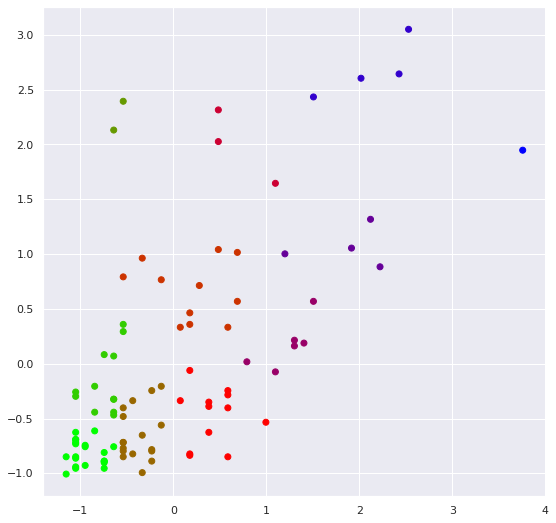

In [ ]:
data3 = preprocessing.scale(fpls)

ap = AffinityPropagation(damping=0.5, max_iter=500, affinity="euclidean", random_state=3)
ap.fit(data3)

plt.figure(figsize =(9, 9))
plt.scatter(data2[:,1], data2[:,0], c=ap.labels_, cmap='brg')

plt.show()

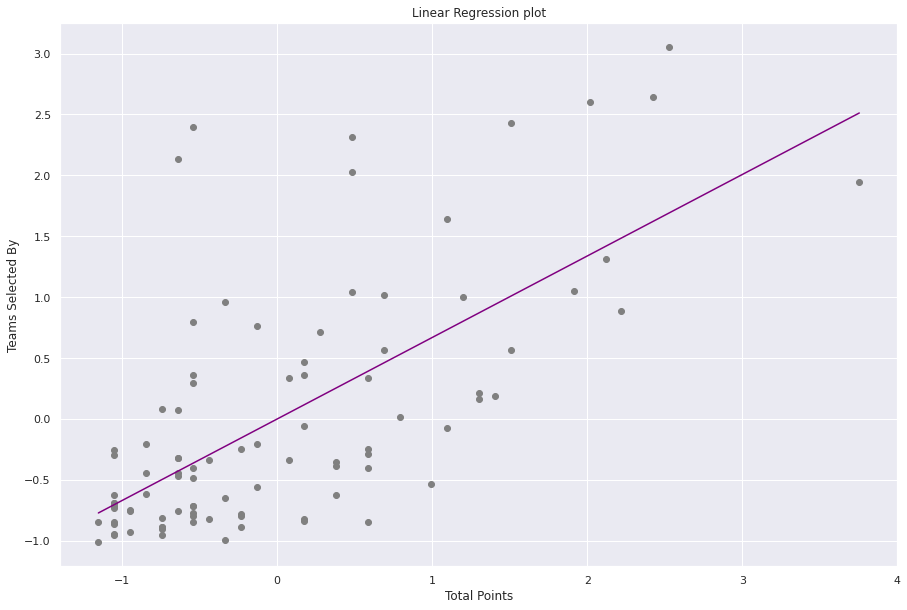

In [ ]:
data4 = preprocessing.scale(fpls)

x = data4[:,1]
y = data4[:,0]


slope, intercept, r, p, std_err = stats.linregress(x,y)

def guessval(x):
  return slope*x + intercept


mymodel = list(map(guessval, x))

plt.scatter(x,y, color="gray")
plt.plot(x, mymodel, color="purple")
plt.title('Linear Regression plot')
plt.xlabel('Total Points')
plt.ylabel('Teams Selected By')
plt.show()

In [ ]:
print(r) # gradient

0.6689154124807446


In [ ]:
data5 = preprocessing.scale(fpls)

X = data5[:,1].reshape(-1,1)
y = data5[:,0].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(regressor.intercept_)
print(regressor.coef_)
df.head()

[-0.07183609]
[[0.63453322]]


,Actual,Predicted
0,2.643590,1.467557
1,0.713419,0.104713
2,2.394113,-0.414466
3,0.017507,0.429200
4,1.645679,0.623892


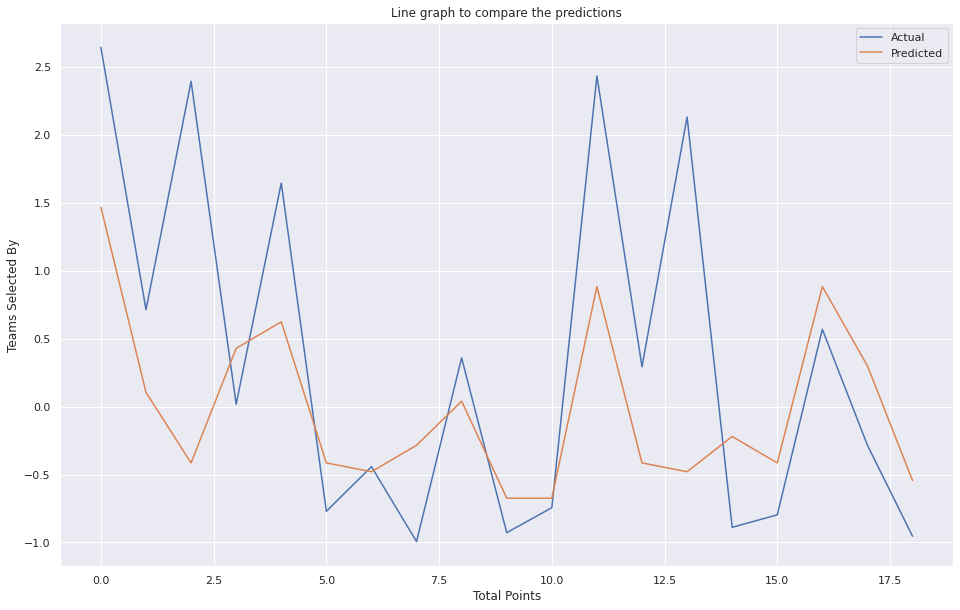

In [ ]:
df1 = df.head(25)
df1.plot(kind = 'line', figsize=(16,10))
plt.title('Line graph to compare the predictions')
plt.xlabel('Total Points')
plt.ylabel('Teams Selected By')
plt.show()

In [ ]:
def predictval(x):
  slope = regressor.coef_
  intercept = regressor.intercept_
  result = (slope*x + intercept)*100
  pick = (result[0])
  return (str(round(pick[0],2))+'%')

predictval(40)

'2530.95%'

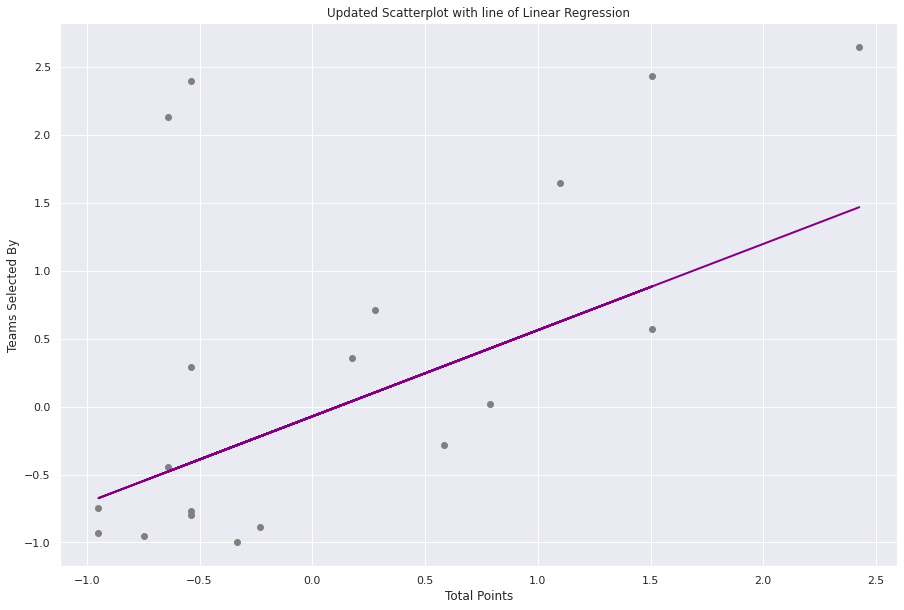

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='purple', linewidth=2)
plt.title('Updated Scatterplot with line of Linear Regression')
plt.xlabel('Total Points')
plt.ylabel('Teams Selected By')
plt.show()

In [ ]:
# algorithm performance
lrMAE = metrics.mean_absolute_error(y_test, y_pred)
lrMSE = metrics.mean_squared_error(y_test, y_pred)
lrRMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', lrMAE)  
# Average absolute different between the predicted and actual value, average error

print('Mean Squared Error:', lrMSE)  
# Average squared difference between the predicted and actual value

print('Root Mean Squared Error:', lrRMSE)
# The square root of value obtained from the mean square error function, error rate


Mean Absolute Error: 0.7894441182663424
Mean Squared Error: 1.188314809096872
Root Mean Squared Error: 1.0900985318295187


In [ ]:
# polynomial regression

X = data5[:,1].reshape(-1,1)
y = data5[:,0].reshape(-1,1)

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=0)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)

df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': poly_reg_y_predicted.flatten()})
df2

,Actual,Predicted
0,2.643590,1.605849
1,0.713419,0.035076
2,2.394113,-0.445661
3,0.017507,0.395398
4,1.645679,0.623762
5,-0.770318,-0.445661
6,-0.442057,-0.494205
7,-0.993535,-0.339941
8,0.358898,-0.032548
9,-0.927883,-0.620720


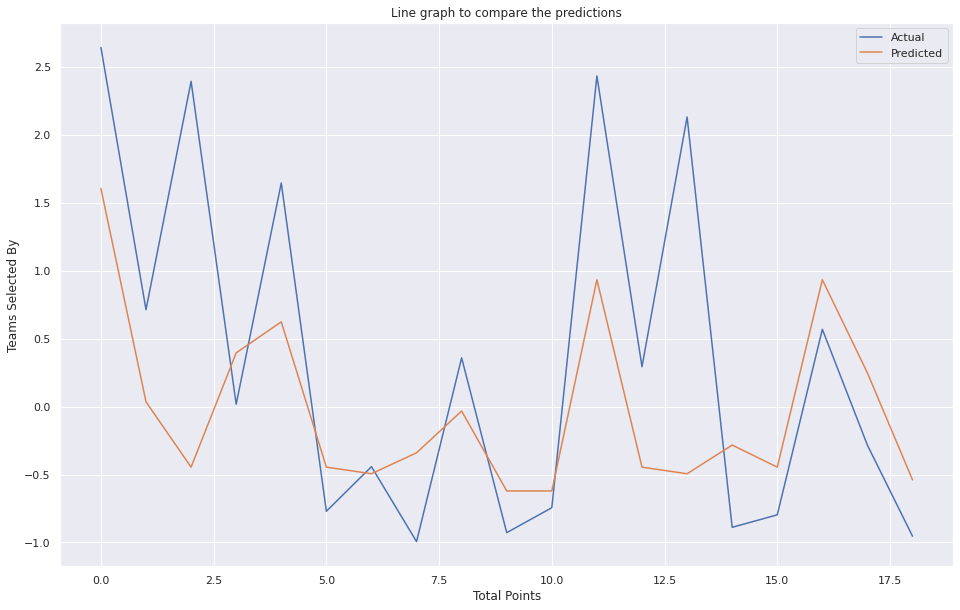

In [ ]:
df3 = df2.head(25)
df2.plot(kind = 'line', figsize=(16,10))
plt.title('Line graph to compare the predictions')
plt.xlabel('Total Points')
plt.ylabel('Teams Selected By')
plt.show()

In [ ]:
print()

def predictvalpol(x):
  result = poly_reg_model.predict(poly.fit_transform([[40]]))
  pick = (result[0]*100)
  return (str(round(pick[0],2))+'%')

predictvalpol(40)

'-136128.6%'

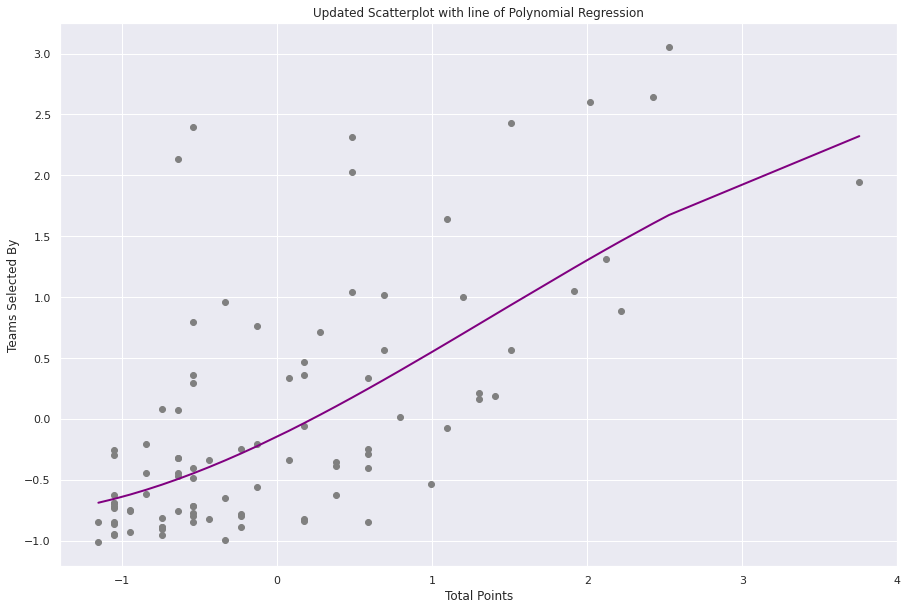

Mean Absolute Error: 0.7863103817532451
Mean Squared Error: 1.176507412424819
Root Mean Squared Error: 1.0846692640730717


In [ ]:
plt.scatter(X, y, color='gray')
plt.plot(X, poly_reg_model.predict(poly.fit_transform(X)), color='purple', linewidth=2)
plt.title('Updated Scatterplot with line of Polynomial Regression')
plt.xlabel('Total Points')
plt.ylabel('Teams Selected By')
plt.show()

# algorithm performance

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_reg_y_predicted))  
# Average absolute different between the predicted and actual value, average error

print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_reg_y_predicted))  
# Average squared difference between the predicted and actual value

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_reg_y_predicted)))
# The square root of value obtained from the mean square error function, error rate